In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Library 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Data Wrangling dan EDA

kedua proses ini bertujuan untuk mengenali **karakteristik data** lebih lanjut.

data wrangling dapat didefinisikan sebagai proses untuk mengubah data mentah menjadi bentuk atau format yang bisa diproses.

sedangkan EDA merupakan proses analisis untuk memahami karakteristik data untuk kemudian dapat dijadikan acuan untuk menyiapkan data sebelum masuk proses modelling

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/python/titanic.csv')

In [ ]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
dataset.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
dataset.shape

(887, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
dataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
dataset.describe(include='object')

,Name,Sex
count,887,887
unique,887,2
top,Mr. Owen Harris Braund,male
freq,1,573


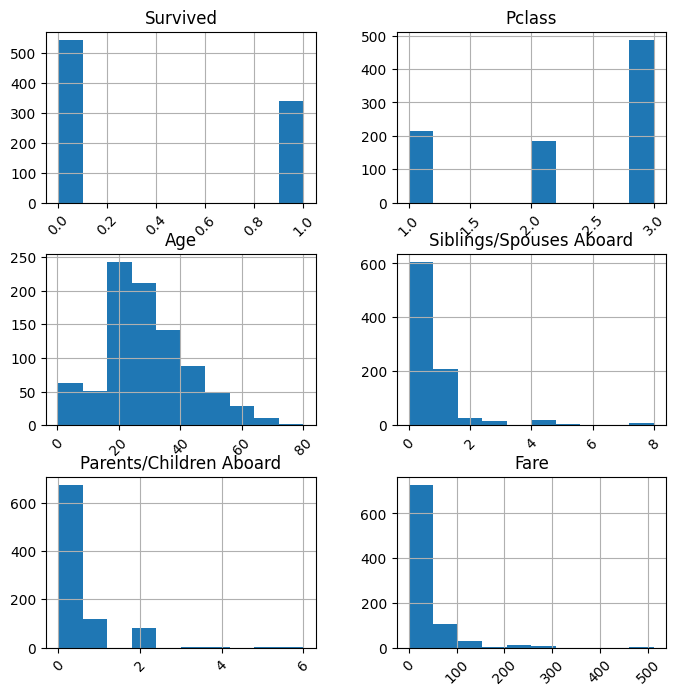

In [ ]:
dataset.hist(figsize=(8,8), xrot=45)
plt.show()

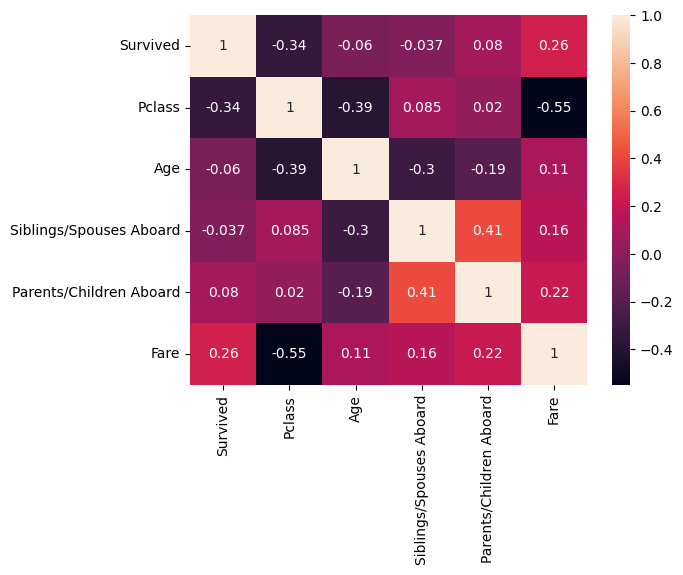

In [ ]:
dataplot=sns.heatmap(dataset.corr(), annot=True)
plt.show()

# Data Preprocessing

merupakan tahapan untuk mengolah data atau mempersiapkan data sebelum masuk pada tahap pelatihan model

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
dataset = dataset.drop(['Name'], axis=1)

In [ ]:
dataset.sample(5)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
652,0,2,male,24.0,2,0,73.50
366,1,3,female,22.0,0,0,7.75
532,1,2,female,7.0,0,2,26.25
438,0,3,male,20.0,0,0,9.50
416,0,2,male,30.0,0,0,13.00


# Feature Engineering

merupakan salah satu langkah untuk melakukan ekstraksi fitur pada data

In [ ]:
dataset = pd.get_dummies(dataset, columns=['Sex'])

In [ ]:
dataset.sample(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
605,1,2,22.0,1,2,41.5792,1,0
776,1,3,13.0,0,0,7.2292,1,0
194,1,1,58.0,0,0,146.5208,1,0
290,0,2,36.0,0,0,12.8750,0,1
749,0,3,23.0,0,0,7.8958,0,1


# Data Splitting

pembagian dataset menjadi data latih dan data uji sebelum diproses pada model

In [ ]:
X = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
clf = RandomForestClassifier(n_estimators = 200, max_depth = 4,
                             random_state = 18).fit(X_train, y_train)
                             
predictions = clf.predict(X_test)                             

# Model Evaluation

evaluasi menggunakan confusion matrix dan classification report

In [ ]:
print("confusion matrix:")
print(confusion_matrix(y_test,predictions))

confusion matrix:
[[98 13]
 [28 39]]


In [ ]:
print("classification report:")
print(classification_report(y_test,predictions))

classification report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       111
           1       0.75      0.58      0.66        67

    accuracy                           0.77       178
   macro avg       0.76      0.73      0.74       178
weighted avg       0.77      0.77      0.76       178

